In [26]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
df = pd.read_excel('translated_1.xlsx')
df['text']=df['text'].astype(str)
df['class']=df['class'].astype(str)

In [28]:
df

,Unnamed: 0,index,Suicide_Detection,text,class
0,0,0,0,mantan istri mengancam bunuh diri barubaru ini...,suicide
1,1,1,1,aneh tidak terpengaruh pujian yang datang tahu...,non-suicide
2,2,2,2,akhirnya mendengar tahun buruk sumpah sialan m...,non-suicide
3,3,3,3,butuh bantuan tolong bantu aku menangis keras,suicide
4,4,4,4,saya hilanghalo adam tahun saya berjuang berta...,suicide
...,...,...,...,...,...
33373,33373,33400,33400,hai remaja pasti,non-suicide
33374,33374,33401,33401,bunuh diri nekat mengambil 1050mg wellbutrin 2...,suicide
33375,33375,33402,33402,impulsif putus asa menuangkan h3arthi ive berp...,suicide
33376,33376,33403,33403,semakin dekat melakukan bunuh diri berhenti be...,non-suicide


In [29]:
# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for i in range(df.shape[0]):
    sentences.append(df['text'][i])
    if df['class'][i] == 'non-suicide':
        labels.append(0)
    else:
        labels.append(1)

In [30]:
sentences

['mantan istri mengancam bunuh diri barubaru ini meninggalkan istri baik ditipu dua kali berbohong memutuskan menolak hari yang lalu mulai mengancam bunuh diri tanpa lelah menghabiskan harihari paat berbicara terus raguragu ingin percaya sakit datang tahu banyak orang mengancam ketertiban cara terjadi seharusnya menangani kematian tangan cinta istri kesepakatan ditipu terusmenerus merasa tidak aman saya khawatir hari ini harapan tidak terjadi',
 'aneh tidak terpengaruh pujian yang datang tahu saya merasa orang asing yang baik di internet',
 'akhirnya mendengar tahun buruk sumpah sialan menyebalkan',
 'butuh bantuan tolong bantu aku menangis keras',
 'saya hilanghalo adam tahun saya berjuang bertahuntahun saya takut tahuntahun terakhir pikiran bunuh diri ketakutan kecemasan saya batas dekat ive tenang lama saya takut datang perasaan keluarga tahun yang lalu kehilangan bibi dipicu perasaan seharihari putus asa kehilangan rasa bersalah halhal yang menyedihkan ive lifebut pikiran seperti s

In [31]:
training_size = 28000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [32]:
vocab_size = 35000
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [33]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [34]:
training_padded

array([[ 393,  519, 1155, ...,    0,    0,    0],
       [ 180,    2, 1840, ...,    0,    0,    0],
       [ 101,  195,   15, ...,    0,    0,    0],
       ...,
       [ 198,   59, 1483, ...,    0,    0,    0],
       [3604,    2,    5, ...,    0,    0,    0],
       [ 330, 4797,  110, ...,    0,    0,    0]])

In [35]:
# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           2240000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,351,489
Trainable params: 2,351,489
No

In [36]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
875/875 [==============================] - 283s 318ms/step - loss: 0.2628 - accuracy: 0.8976 - val_loss: 0.1939 - val_accuracy: 0.9262
Epoch 2/10
875/875 [==============================] - 256s 292ms/step - loss: 0.1529 - accuracy: 0.9466 - val_loss: 0.2272 - val_accuracy: 0.9173
Epoch 3/10
875/875 [==============================] - 253s 290ms/step - loss: 0.1190 - accuracy: 0.9596 - val_loss: 0.2242 - val_accuracy: 0.9117
Epoch 4/10
875/875 [==============================] - 252s 288ms/step - loss: 0.0970 - accuracy: 0.9662 - val_loss: 0.2438 - val_accuracy: 0.9117
Epoch 5/10
875/875 [==============================] - 256s 292ms/step - loss: 0.0768 - accuracy: 0.9736 - val_loss: 0.2970 - val_accuracy: 0.9096
Epoch 6/10
875/875 [==============================] - 264s 302ms/step - loss: 0.0618 - accuracy: 0.9790 - val_loss: 0.2674 - val_accuracy: 0.9120
Epoch 7/10
875/875 [==============================] - 256s 293ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.3479 -

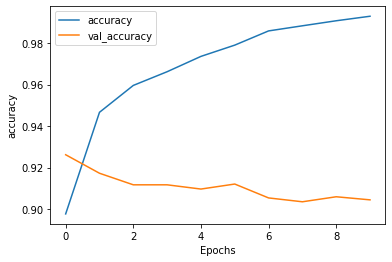

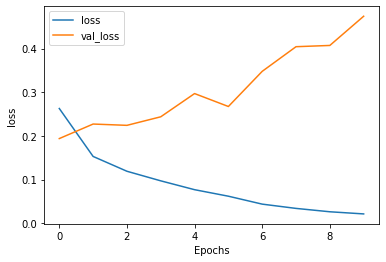

In [39]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [40]:
# Build the model
drop_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
drop_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           2240000   
                                                                 
 dropout (Dropout)           (None, 300, 64)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 300, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [41]:
# Set the training parameters
drop_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Train the model
drop_history = drop_model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
875/875 [==============================] - 275s 309ms/step - loss: 0.2828 - accuracy: 0.8905 - val_loss: 0.1992 - val_accuracy: 0.9247
Epoch 2/10
875/875 [==============================] - 270s 309ms/step - loss: 0.1754 - accuracy: 0.9376 - val_loss: 0.2064 - val_accuracy: 0.9182
Epoch 3/10
875/875 [==============================] - 252s 288ms/step - loss: 0.1381 - accuracy: 0.9526 - val_loss: 0.2135 - val_accuracy: 0.9215
Epoch 4/10
875/875 [==============================] - 260s 297ms/step - loss: 0.1163 - accuracy: 0.9605 - val_loss: 0.2421 - val_accuracy: 0.9143
Epoch 5/10
875/875 [==============================] - 257s 294ms/step - loss: 0.0986 - accuracy: 0.9677 - val_loss: 0.2245 - val_accuracy: 0.9171
Epoch 6/10
875/875 [==============================] - 262s 300ms/step - loss: 0.0897 - accuracy: 0.9706 - val_loss: 0.2577 - val_accuracy: 0.9137
Epoch 7/10
875/875 [==============================] - 257s 293ms/step - loss: 0.0785 - accuracy: 0.9733 - val_loss: 0.2666 -

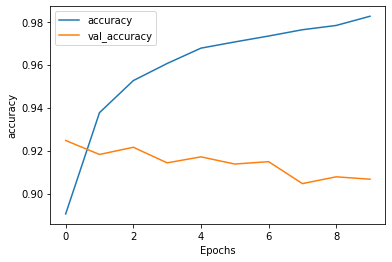

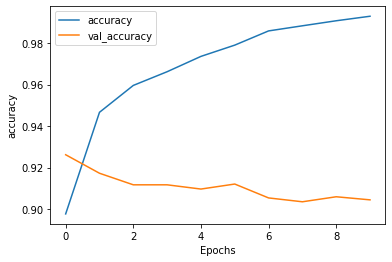

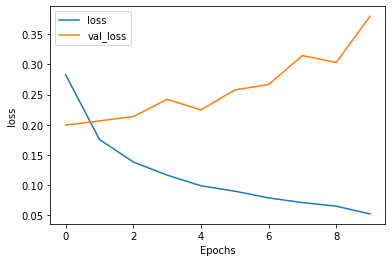

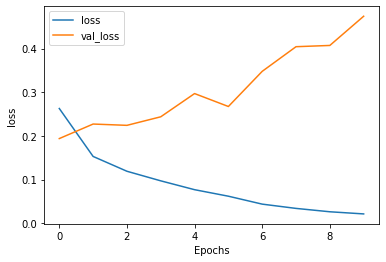

In [45]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(drop_history, 'accuracy')
plot_graphs(history, 'accuracy')
plot_graphs(drop_history, 'loss')
plot_graphs(history, 'loss')

In [93]:
data = ["aku ingin bunuh diri",
        "aku tidak mati",
        "aku senang",
        "aku merasa sedih pacarku meninggalkanku",
        "hari ini aku senang tetapi kemudian aku merasa sedih karena aku mengapatkan kabar yang tidak baik",
        "aku berbohong",
        "dia jahat sekali",
        "hari ini menyebalkan",
        "aku merasa ingin bunuh diri",
        "aku sedih"]
# Generate and pad the testing sequences
validation_sequences = tokenizer.texts_to_sequences(data)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [94]:
prediction = drop_model.predict(validation_padded)
print(prediction)

1/1 [==============================] - 0s 71ms/step
[[0.9448341 ]
 [0.84114844]
 [0.26728314]
 [0.99245554]
 [0.9538127 ]
 [0.86236715]
 [0.14791818]
 [0.22854616]
 [0.94759625]
 [0.01503449]]


In [83]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(35000, 64)


In [84]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

In [86]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, 33822):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()